# Numerical Methods

Name: Francis Araújo

**Keywords:** Bisection Method,  Newton-Raphson Method

# Bisection Method

**Definition:** The bisection method consists of sucessive approximations to narrows down an interval which contains the root of the function by selecting the subinterval that the function changes sign.

**Theorem:** Let $A \subseteq R$. If $f : A → R$ is a continuous function and there exist $ \underline{x} \in A$ and $\overline{x} \in A$ such that: 

- $ \underline{x} < \overline{x} $
- $f(\underline{x})f(\overline{x}) < 0 $

Then, $ \exists$ $\tilde{x} \in [\underline{x},\overline{x}]$ such that $ f(\tilde{x}) = 0$. If $ f'(x) < 0$ $\forall x \in A $, then the solution is unique.

In [1]:
# Import package
import numpy as np
import math
import sympy # Calculus 
from sympy import *
import time
import matplotlib.pyplot as plt

In [2]:
# STANDARD BISECTION METHOD (HALF-INTERVAL SEARCH)

def stand_bisection_method(f, lower, upper, error=math.exp(-10)):
    if f(lower)*f(upper) > 0:
        print('Bisection Method fails. Please find a and b such that f(a) < 0 < f(b)')
    elif f(lower)*f(upper) == 0:
        print('Either one or both numbers are root of the polynomial. No need to apply the method.')
    else:
        while abs(upper - lower) > error:
            x_m = 0.5*(lower + upper)
            print(f'Current middle point = {x_m}')
            if f(x_m) == 0:
                break
            elif f(x_m) < 0:
                lower = x_m
            else:
                upper = x_m

Let's evaluate the method perfomance for a function defined as:

$$f(x) = x^{3} \cdot exp(-x^{2}) + sin(x^{2})$$

In [3]:
stand_bisection_method(f = lambda x: x**3*math.exp(-x**2) + np.sin(x**2), lower = -2.5, upper = 1)

Current middle point = -0.75
Current middle point = -1.625
Current middle point = -2.0625
Current middle point = -1.84375
Current middle point = -1.734375
Current middle point = -1.6796875
Current middle point = -1.70703125
Current middle point = -1.693359375
Current middle point = -1.6865234375
Current middle point = -1.68994140625
Current middle point = -1.691650390625
Current middle point = -1.6907958984375
Current middle point = -1.69122314453125
Current middle point = -1.691436767578125
Current middle point = -1.6915435791015625
Current middle point = -1.6914901733398438
Current middle point = -1.6914634704589844


Note, however, that the procedure does not guarantee the uniqueness of a solution.

We can also use the bisection method to optimize functions whose solutions lie inside the feasible region.

In [4]:
# LOCAL MAXIMUM/MINIMUM BISECTION METHOD (HALF-INTERVAL SEARCH)

def max_bisection_method(f, lower, upper, error=math.exp(-10)):
    x = symbols('x')
    f = sympy.sympify(f)
    f_prime = sympy.diff(f,x)
    f_double_prime = sympy.diff(f,x,2)
    if f_prime.evalf(subs={x: lower}) > 0 and f_prime.evalf(subs={x: upper}) < 0 and f_double_prime.evalf(subs={x: upper}) < 0 and f_double_prime.evalf(subs={x: upper}) < 0:  # Check if there is a maximum between two points
        if abs(upper-lower) < error:
            return   0.5 * (upper + lower), f.evalf(subs={x: 0.5 * (upper + lower) })
        else:
            middle = 0.5 * (upper + lower)
            if f_prime.evalf(subs={x: middle})*f_prime.evalf(subs={x: lower}) < 0:  # Maximum is btw lower and middle
                return max_bisection_method(f, lower, middle)
            else:  # Maximum is btw middle and upper
                return max_bisection_method(f, middle, upper)
    elif f_prime.evalf(subs={x: lower}) < 0 and f_prime.evalf(subs={x: upper}) > 0 and f_double_prime.evalf(subs={x: upper}) > 0 and f_double_prime.evalf(subs={x: upper}) > 0:  # Check if there is a minimum between two points
        if abs(upper - lower) < error:
            return 0.5 * (upper + lower), f.evalf(subs={x: 0.5 * (upper + lower) })
        else:
            middle = 0.5 * (upper + lower)
            if f_prime.evalf(subs={x: middle})*f_prime.evalf(subs={x: lower}) < 0:  # Minimum is btw lower and middle
                return max_bisection_method(f, lower, middle)
            else:  # Minimum is btw middle and upper
                return max_bisection_method(f, middle, upper)
    else:  # Otherwise
        print('Conditions are not satisfied.')

Note that the approach is slightly different from the previous example. In this case, there is a function inside another function in order to avoid the while loop.

__Target function:__ $$f(x) = x^{3} \cdot exp(-x^{2})$$

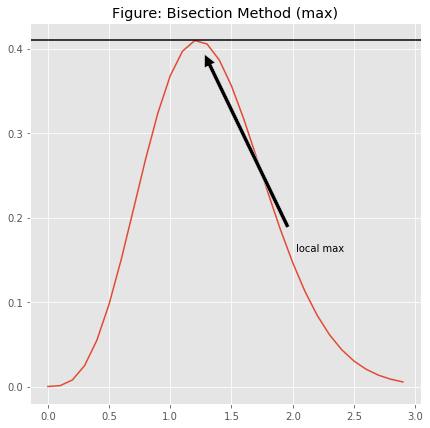

In [16]:
# Plot
implemented_function = 'exp(-1*x**2)*x**3'
g1 = np.arange(0, 3, 0.1) # Define the Grid
y1 = np.exp(-1*g1**2)*g1**3
implemented_function = 'exp(-1*x**2)*x**3'
x_max = max_bisection_method(f = implemented_function, lower = 0.5, upper = 1.3)[0]
y_max = max_bisection_method(f = implemented_function, lower = 0.5, upper = 1.3)[1]
plt.plot(g1, y1)
plt.title('Figure: Bisection Method (max)')
plt.axhline(y=y_max, color='black', linestyle='-')
plt.annotate('local max', xy=(x_max, y_max), xytext=(x_max + 0.8, y_max - 0.25),
             arrowprops=dict(facecolor='black', shrink=0.07),)
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [7, 7]
plt.show()

However, the previous method is not able to compute the local optimal value when the derivative is not well-defined.

Alternatively, someone could redefine the algorithm to compute global maximum. The initial conditions are supposed to be:

- $ x_1 < x_2 < x_3$
- $ f(x_2) > f(x_1)$
- $ f(x_2) > f(x_3) $


Those conditions are essential to rule out the possibility of the optimal values occur at the boundaries.

In [6]:
# GLOBAL MAXIMUM BISECTION METHOD (HALF-INTERVAL SEARCH)

def global_bisection_method(f, first_x, second_x, third_x, error=math.exp(-10)):
    # User input in a list
    x_order = []
    x_order.append(first_x)
    x_order.append(second_x)
    x_order.append(third_x)
    # Sort list in ascending order
    x_order.sort()
    x_1 = x_order[0]
    x_2 = x_order[1]
    x_3 = x_order[2]
    if f(x_2) > f(x_1) and f(x_2) > f(x_3):
        while abs(x_1 - x_3) > error:
            x_M1 = 0.5*(x_1 + x_2)
            x_M2 = 0.5*(x_2 + x_3)
            if f(x_2) > f(x_M1) and f(x_2) > f(x_M2):
                x_1 = x_M1
                x_3 = x_M2
            elif f(x_M2) > f(x_2) and f(x_M2) > f(x_M1):
                x_1 = x_2
                x_2 = x_M2
            else:
                x_3 = x_2
                x_2 = x_M1

        print(0.5*(x_1 + x_3))
    else:
        print('Bisection method fails')

__Target function:__ $$f(x) = x^{3} - 6x^{2} -15x + 8$$

In [7]:
global_bisection_method(f = lambda x: x**3 - 6*x**2 -15*x + 8, first_x = -2, second_x=0.1, third_x = 6, error=math.exp(-20))

-1.0000000116880983


# Newton-Raphson Method

**Definition:** This root-finding algorithm produces better approximations to the root of a real-valued function considering the intersection of x-axis and the tangent of the graph.

The method can be derived as follows:
    
Applying the first-order taylor approximation around $ x_0 $

$$ f(x) \approx f\left(x_{0}\right)+f^{\prime}\left(x_{0}\right)\left(x-x_{0}\right)$$

Setting $f(x) = 0$ and solving for x

\begin{array}{c}{0=f\left(x_{0}\right)+f^{\prime}\left(x_{0}\right)\left(x-x_{0}\right)} \\ {f^{\prime}\left(x_{0}\right)\left(x-x_{0}\right)=-f\left(x_{0}\right)} \\ {x-x_{0}=-\frac{f\left(x_{0}\right)}{f^{\prime}\left(x_{0}\right)}} \\ {x=x_{0}-\frac{f\left(x_{0}\right)}{f^{\prime}\left(x_{0}\right)}}\end{array}

In [8]:
# Parameters
# max_Iter = Maximum number of Iterations
# Iter = Current 
# x_0 = initial value
# f = function
# epsilon = error tolerance

# X values list
value = []

def newton_raphson(f, x_0, max_Iter, epsilon = math.exp(-10) ):
    x = symbols('x')
    f = sympy.sympify(f)
    f_prime = sympy.diff(f,x)
    Iter = 0
    if abs(f.evalf(subs={x: x_0})) < epsilon:
        return x_0
    else:
        while Iter < max_Iter and abs(f.evalf(subs={x: x_0})) > epsilon:
            x_new = x_0 - f.evalf(subs={x: x_0})/f_prime.evalf(subs={x: x_0})
            value.append(x_new)
            x_0 = x_new  # Redefine variables inside the loop
            Iter = Iter + 1

        return value

__Target function:__ $$ sin[4 \cdot (x - \frac{1}{4})] + x + x^{20} - 1  $$

In [9]:
print(newton_raphson(f = 'sin(4 * (x - 1/4)) + x + x**20 - 1', x_0 = 0.2 , max_Iter = 25))

[0.402970584841736, 0.408262736124847, 0.408293503218815]


However, If the initial value $x_0$ is 0.7, it leads to failure of convergence. Take a look at the last 6 elements.

In [10]:
print(newton_raphson(f = 'sin(4 * (x - 1/4)) + x + x**20 - 1', x_0 = 0.7 , max_Iter = 70)[-7:-1])

[-1.12524205622660, -1.07551192375073, -1.03573190690332, -1.01118321640315, -1.00300504085853, -1.00225273554209]
